# importing tensorflow and keras

In [2]:
import tensorflow as tf
tf.__version__


'2.6.0'

In [3]:
from tensorflow import keras
keras.__version__

'2.6.0'

# Fetch and Load the Dataset

In [4]:
fashion_cloth = keras.datasets.fashion_mnist
(X_train , y_train) ,  (X_test , y_test )= fashion_cloth.load_data()


In [5]:
print(X_train.shape , X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
print(y_train.shape , y_test.shape)

(60000,) (10000,)


In [7]:
print(X_train.dtype , X_test.dtype)

uint8 uint8


In [8]:
print(y_train.dtype , y_test.dtype)

uint8 uint8


In [9]:
# The first five outputs

In [10]:
print(y_train[0:5])

[9 0 0 3 0]


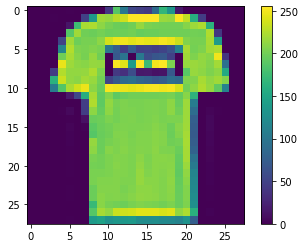

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.show()

In [12]:
# since we are going to train the neural network using Gradient Descent, we must scale the input features. 
# For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 
# (this also converts them to floats):

In [13]:
X_valid , X_train = X_train[:5000] , X_train[5000:]
y_valid , y_train = y_train[:5000] , y_train[5000:]

In [14]:
print(X_valid.shape , X_train.shape)

(5000, 28, 28) (55000, 28, 28)


In [15]:
print(y_valid.shape , y_train.shape)

(5000,) (55000,)


In [16]:
X_train_image = X_train/255.0
X_test_image = X_test/255.0

In [17]:
X_valid_image = X_valid/255.0

In [18]:
print(X_train_image.dtype , X_test_image.dtype)

float64 float64


In [19]:
print(X_valid_image.dtype)

float64


In [20]:
# With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. 
# Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

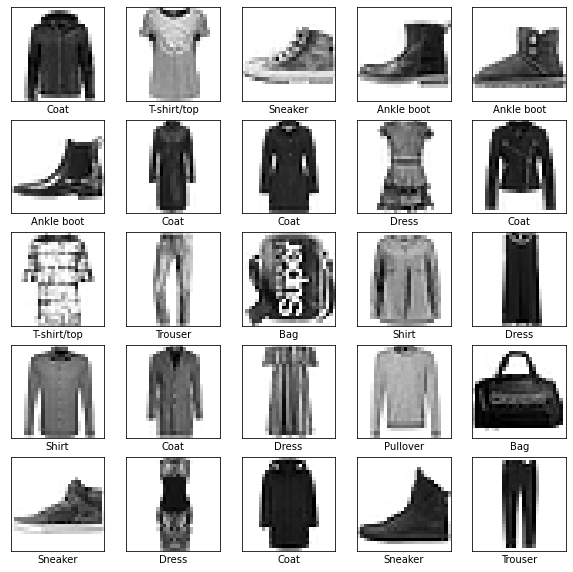

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10 , 10))
for i in range(25):
    plt.subplot(5 , 5 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_train_image[i] , cmap = 'gray_r')
    plt.xlabel(class_names[y_train[i]])

# Ways Of Creating A Sequential API 


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
model1 = Sequential()
model1.add(Flatten(input_shape=[28, 28]))
model1.add(Dense(300, activation=activations.relu))
model1.add(Dense(100, activation=activations.relu))
model1.add(Dense(10, activation=activations.softmax))


In [24]:
from tensorflow import keras
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape =[28 , 28]))
model1.add(keras.layers.Dense(300 , activation='relu'))
model1.add(keras.layers.Dense(100 , activation='relu'))
model1.add(keras.layers.Dense(10 , activation='softmax'))


In [25]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28 , 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100 , activation='relu'),
    keras.layers.Dense(10 , activation='softmax')
])

# Model Summary

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Name Of The Layers and Get Weights

In [27]:
# You can easily get a model’s list of layers, to fetch a layer by its index,
# or you can fetch it by name:

In [28]:
model.layers

In [29]:
hidden1= model.layers[1]

In [30]:
hidden1.name

'dense_6'

In [31]:
weights , biases= hidden1.get_weights()


In [32]:
# Randomly Initialized Weights , to avoid symmetry

In [33]:
print(weights)

[[-0.03399783  0.00891647 -0.01866664 ... -0.03663654 -0.04177564
  -0.0493339 ]
 [-0.00946014 -0.02782402 -0.05889514 ...  0.03751629  0.03287404
   0.05106252]
 [ 0.02459896  0.01930022  0.06457363 ...  0.01374599 -0.05961849
   0.06714362]
 ...
 [-0.03704675  0.02300972  0.05418816 ...  0.03329998  0.03305144
  -0.05358634]
 [-0.02900194  0.03246311 -0.01493763 ... -0.05527736 -0.01991111
  -0.0557047 ]
 [-0.04444537  0.04101329 -0.05855468 ... -0.03448799  0.06708179
  -0.07437816]]


In [34]:
weights.shape

(784, 300)

In [35]:
# Initialize all of the biases by 0

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
print(biases.shape)

(300,)


In [38]:
# The Weights and the Layers in the second layer
hidden2= model.layers[2]
hidden2.name

'dense_7'

In [39]:
weights_second , biases_second= hidden2.get_weights()
print(weights_second)

[[-0.04006894 -0.03976006 -0.08767439 ... -0.02857391  0.07472689
   0.02000613]
 [ 0.104591    0.02536043 -0.06828272 ... -0.11789592 -0.08090965
  -0.10618346]
 [ 0.06592705  0.11319698 -0.10426375 ...  0.09695072  0.07419565
  -0.01859307]
 ...
 [ 0.09413231 -0.07876489 -0.01738092 ... -0.06071786  0.09248618
  -0.005236  ]
 [-0.06879609 -0.01503731  0.11075095 ...  0.03079139 -0.07907316
   0.05102456]
 [ 0.07264528 -0.00620934 -0.07266313 ... -0.09091763  0.09921771
  -0.0376782 ]]


In [40]:
print(weights_second.shape)

(300, 100)


In [41]:
print(biases_second)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Compile The Model

In [42]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='sgd' , metrics=['accuracy'])

In [43]:
# there is another way to compile

In [44]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy , optimizer = keras.optimizers.SGD() , 
              metrics = [keras.metrics.sparse_categorical_accuracy])

# Traning and Evaluating the Model

In [45]:
print(X_valid_image.shape , y_valid.shape)

(5000, 28, 28) (5000,)


In [46]:
history = model.fit(X_train_image , y_train , epochs=30 , validation_data = (X_valid_image , y_valid))


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7257 - sparse_categorical_accuracy: 0.7619 - val_loss: 0.5136 - val_sparse_categorical_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4907 - sparse_categorical_accuracy: 0.8294 - val_loss: 0.4882 - val_sparse_categorical_accuracy: 0.8274
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4444 - sparse_categorical_accuracy: 0.8443 - val_loss: 0.4149 - val_sparse_categorical_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4154 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.3995 - val_sparse_categorical_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3942 - sparse_categorical_accuracy: 0.8602 - val_loss: 0.3804 - val_sparse_categorical_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3786 - spars

In [47]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [48]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [49]:
history.history

{'loss': [0.7256861925125122,
  0.4906933605670929,
  0.4444184899330139,
  0.41542860865592957,
  0.3941616415977478,
  0.37864887714385986,
  0.3653862178325653,
  0.35228610038757324,
  0.3422378599643707,
  0.33280569314956665,
  0.3246994614601135,
  0.31573715806007385,
  0.31002548336982727,
  0.302712082862854,
  0.29652532935142517,
  0.2900121510028839,
  0.28454068303108215,
  0.2791195809841156,
  0.27388978004455566,
  0.26897314190864563,
  0.2629047632217407,
  0.2588421106338501,
  0.25509440898895264,
  0.24958787858486176,
  0.24571438133716583,
  0.2424594759941101,
  0.23830153048038483,
  0.233991339802742,
  0.23169323801994324,
  0.22586573660373688],
 'sparse_categorical_accuracy': [0.7619090676307678,
  0.8294000029563904,
  0.8443272709846497,
  0.8540727496147156,
  0.8602363467216492,
  0.8667636513710022,
  0.8705818057060242,
  0.8763090968132019,
  0.8775454759597778,
  0.8818727135658264,
  0.8838545680046082,
  0.8860909342765808,
  0.8881818056106567,


# Model Evaluation

In [50]:
model.evaluate(X_test_image , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3286 - sparse_categorical_accuracy: 0.8847


[0.32858407497406006, 0.8847000002861023]

# Using the model to make predictions

In [51]:
X_new= X_test_image[:3]
y_pred_proba = model.predict(X_new)
y_pred_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [55]:
# Predict the class instead

In [ ]:
y_pred_class= model.predict_classes(X_new)
print(y_pred_class)

In [53]:
y_new= y_test[:3]
print(y_new)

[9 2 1]


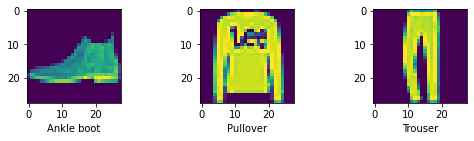

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15 , 10))
for i in range(3):
    plt.subplot(5 , 5 , i+1)
    plt.imshow(X_new[i])
    plt.xlabel(class_names[y_test[i]])